In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Baixar os dados históricos do Ibovespa
ticker = yf.Ticker('PRIO3.SA')
historical_data = ticker.history(start='2000-01-01')

In [3]:
# historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-10-25,24.061354,24.360872,22.065359,23.302572,25180000,0.0,0.0
2010-10-26,22.763637,23.362475,22.463919,22.463919,7200000,0.0,0.0
2010-10-27,22.463919,23.162797,22.166796,22.663599,3685000,0.0,0.0
2010-10-28,22.673581,22.673581,22.064561,22.463919,2900000,0.0,0.0
2010-10-29,22.563758,22.863276,22.364078,22.703533,825000,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-04,44.709999,44.900002,44.020000,44.810001,6191500,0.0,0.0
2024-10-07,44.900002,45.549999,44.770000,45.529999,8799000,0.0,0.0
2024-10-08,44.250000,44.570000,44.049999,44.110001,10127500,0.0,0.0


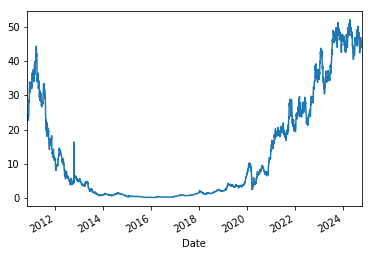

In [4]:
historical_data['High'].plot()

In [2]:
ibov = pd.read_csv("comp_ibov.csv")

In [6]:
historical_data['High'].max()-historical_data['Low'].min()

51.99322076713796

In [7]:
#criando função que vai iterar em todos os tickers

In [8]:
list_max_min=[]
def constroi_modulo(ticker_name):
    ticker = yf.Ticker(ticker_name)
    historical_data = ticker.history(start='2008-01-01')
    var=(historical_data['High'].max()-historical_data['Low'].min())/historical_data['Low'].min()
    list_max_min.append([ticker_name,var])

In [9]:
for i in ibov['Código']:
    constroi_modulo(i+'.SA')

KeyboardInterrupt: 

In [ ]:
list_max_min

In [ ]:
df=pd.DataFrame(list_max_min).rename(columns={0: "Ticker", 1: "var"})

In [ ]:
df['var'].mean()

In [ ]:
df.sort_values(by='var',ascending=False)[:20]

In [ ]:
prep=df.sort_values(by='var',ascending=False)[:20].reset_index().drop('index',axis=1)

In [ ]:
prep.to_latex(index=False)

In [8]:
ibov['SA']= ibov['Código']+'.SA'

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Lista de tickers
tickers = ibov['SA']  # Adicione todos os tickers do Ibovespa aqui

# Datas de início e fim da análise
start_date = '2008-01-01'
end_date = '2024-09-24'

# Valor inicial de investimento por empresa
initial_investment = 1000

# Cria um DataFrame com todas as datas do período
date_range = pd.date_range(start=start_date, end=end_date)

# DataFrames para armazenar o valor do portfólio e dividendos
portfolio_values = pd.DataFrame(index=date_range)
dividend_account = pd.DataFrame(index=date_range)

for ticker in tickers:
    # Baixar dados históricos do ticker
    stock = yf.download(ticker, start=start_date, end=end_date)
    
    # Baixar dados de dividendos separadamente
    ticker_object = yf.Ticker(ticker)
    dividends = ticker_object.dividends
    
    # Verifica se existem dividendos
    if dividends.empty:
        dividends = pd.Series(0, index=stock.index)  # Cria uma série de dividendos vazia

    # Preço da ação na data de 01/01/2008
    initial_price = stock.loc[stock.index[0], 'Close']
    
    # Quantidade de ações compradas com R$1000
    shares = initial_investment / initial_price
    
    # Valor do portfólio ao longo do tempo (número de ações * preço de fechamento diário)
    stock['Portfolio Value'] = shares * stock['Close']
    
    # Reindexa o DataFrame para o intervalo de datas completo, preenchendo os valores ausentes com 0
    stock_reindexed = stock.reindex(date_range, fill_value=0)
    dividends_reindexed = dividends.reindex(date_range, fill_value=0)
    
    # Adiciona os valores ao DataFrame do portfólio
    portfolio_values[ticker] = stock_reindexed['Portfolio Value']
    
    # Acumula dividendos ao longo do tempo
    dividends_received = (dividends_reindexed * shares).cumsum()
    
    # Adiciona os dividendos ao DataFrame
    dividend_account[ticker] = dividends_received

# Soma o valor total do portfólio e dividendos de todas as empresas
portfolio_values['Total Portfolio'] = portfolio_values.sum(axis=1)
dividend_account['Total Dividends'] = dividend_account.sum(axis=1)

In [34]:
port_clean['Total Portfolio']=portfolio_values['Total Portfolio'].loc[portfolio_values['Total Portfolio'] != 0]

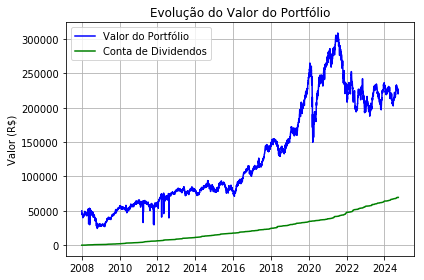

In [38]:
# Plotando os gráficos
# Gráfico do valor do portfólio
plt.plot(port_clean['Total Portfolio'].index, port_clean['Total Portfolio'], label='Valor do Portfólio', color='blue')
plt.plot(dividend_account.index, dividend_account['Total Dividends'], label='Conta de Dividendos', color='green')
plt.title('Evolução do Valor do Portfólio')
plt.ylabel('Valor (R$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('portifolio_mil_ibov.png')
# plt.show()